# This is the Boston datasets that I will use for my prediction

In [1]:
from keras.datasets import boston_housing
from keras import models
from keras import layers
import numpy as np
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [0]:
(train_data, train_labels),(test_data, test_labels) =boston_housing.load_data()

In [3]:
train_data.shape

(404, 13)

In [4]:
train_labels.shape

(404,)

In [5]:
test_data.shape

(102, 13)

In [6]:
train_labels

array([15.2, 42.3, 50. , 21.1, 17.7, 18.5, 11.3, 15.6, 15.6, 14.4, 12.1,
       17.9, 23.1, 19.9, 15.7,  8.8, 50. , 22.5, 24.1, 27.5, 10.9, 30.8,
       32.9, 24. , 18.5, 13.3, 22.9, 34.7, 16.6, 17.5, 22.3, 16.1, 14.9,
       23.1, 34.9, 25. , 13.9, 13.1, 20.4, 20. , 15.2, 24.7, 22.2, 16.7,
       12.7, 15.6, 18.4, 21. , 30.1, 15.1, 18.7,  9.6, 31.5, 24.8, 19.1,
       22. , 14.5, 11. , 32. , 29.4, 20.3, 24.4, 14.6, 19.5, 14.1, 14.3,
       15.6, 10.5,  6.3, 19.3, 19.3, 13.4, 36.4, 17.8, 13.5, 16.5,  8.3,
       14.3, 16. , 13.4, 28.6, 43.5, 20.2, 22. , 23. , 20.7, 12.5, 48.5,
       14.6, 13.4, 23.7, 50. , 21.7, 39.8, 38.7, 22.2, 34.9, 22.5, 31.1,
       28.7, 46. , 41.7, 21. , 26.6, 15. , 24.4, 13.3, 21.2, 11.7, 21.7,
       19.4, 50. , 22.8, 19.7, 24.7, 36.2, 14.2, 18.9, 18.3, 20.6, 24.6,
       18.2,  8.7, 44. , 10.4, 13.2, 21.2, 37. , 30.7, 22.9, 20. , 19.3,
       31.7, 32. , 23.1, 18.8, 10.9, 50. , 19.6,  5. , 14.4, 19.8, 13.8,
       19.6, 23.9, 24.5, 25. , 19.9, 17.2, 24.6, 13

In [0]:
mean =train_data.mean(axis =0)
std  =train_data.std(axis =0)
train_data =train_data - mean
train_data =train_data /std

test_data =test_data -mean
test_data =test_data / std


# We build our model

In [0]:
def build_model():
  model_1 =models.Sequential()
  model_1.add(layers.Dense(64, activation='relu', input_shape =(train_data.shape[1],)))
  model_1.add(layers.Dense(64, activation ='relu'))
  model_1.add(layers.Dense(1))
  model_1.compile(optimizer ='rmsprop', loss='mse', metrics=['mae'])
  return model_1

#model =build_model()


In [0]:
 k =4
 num_val_samples =len(train_data) // k
 all_score =[]
 all_mae_scores =[]

In [10]:
for i in range(k):
  print('Processing folds is #',i)
  val_data =train_data[i * num_val_samples:(i +1) * num_val_samples]
  val_labels =train_labels[i * num_val_samples: (i + 1) * num_val_samples]
  partial_train_data   = np.concatenate([train_data[:i * num_val_samples], train_data[(i + 1) * num_val_samples:]], axis=0)
  partial_train_labels = np.concatenate([train_labels[:i * num_val_samples], train_labels[(i + 1) * num_val_samples:]])

Processing folds is # 0
Processing folds is # 1
Processing folds is # 2
Processing folds is # 3


In [33]:
model = build_model()
network_1 =model.fit(partial_train_data, partial_train_labels, epochs=5, batch_size=1)
val_mse, val_mae =(val_data, val_labels)
all_score.append(val_mae)
all_scores.append(val_mse)

Epoch 1/5
303/303 [==============================] - 0s 1ms/step - loss: 178.5296 - mae: 9.8378
Epoch 2/5
303/303 [==============================] - 0s 1ms/step - loss: 25.2890 - mae: 3.3719
Epoch 3/5
303/303 [==============================] - 0s 1ms/step - loss: 19.8219 - mae: 2.9358
Epoch 4/5
303/303 [==============================] - 0s 1ms/step - loss: 16.8279 - mae: 2.7204
Epoch 5/5
303/303 [==============================] - 0s 1ms/step - loss: 14.5869 - mae: 2.5475


In [0]:
network_1_dict =network_1.history

In [35]:
network_1_dict

{'loss': [178.52958466803267,
  25.289020842022403,
  19.8218855034027,
  16.827930437966494,
  14.58688631224874],
 'mae': [9.837761, 3.3718684, 2.9357743, 2.7203987, 2.5474713]}

In [36]:
network_1_dict.keys()

dict_keys(['loss', 'mae'])

In [0]:
myloss =network_1_dict['loss']
mymae  =network_1_dict['mae']

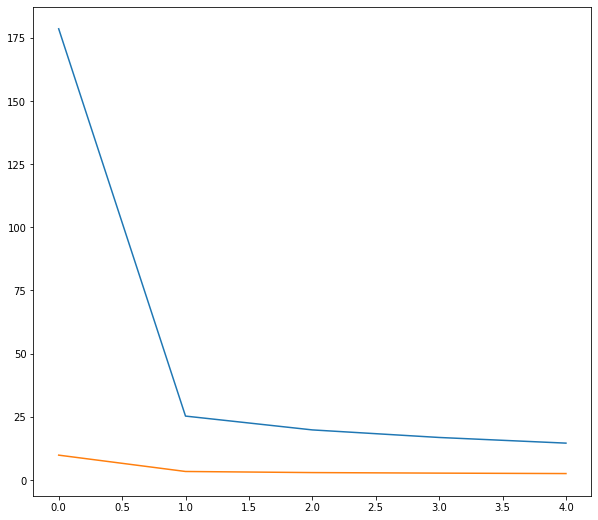

In [47]:
plt.figure(figsize =(10, 9))
plt.plot(myloss,  label='Training Losses')
plt.plot(mymae, label=('Validation Losses'))


In [0]:
y_predict =model.predict(test_data)

In [50]:
print(y_predict)

[[ 8.34609  ]
 [17.702364 ]
 [21.561893 ]
 [29.36466  ]
 [24.79196  ]
 [18.94592  ]
 [25.927614 ]
 [21.642427 ]
 [19.638323 ]
 [21.142405 ]
 [18.341627 ]
 [17.76055  ]
 [17.589266 ]
 [40.723328 ]
 [16.862984 ]
 [18.139906 ]
 [27.39675  ]
 [21.24077  ]
 [18.503824 ]
 [23.406214 ]
 [12.511705 ]
 [15.478947 ]
 [20.435038 ]
 [13.704268 ]
 [23.098738 ]
 [22.651228 ]
 [30.013754 ]
 [29.24061  ]
 [10.966835 ]
 [20.702452 ]
 [19.192196 ]
 [14.201758 ]
 [31.766394 ]
 [25.510853 ]
 [17.052828 ]
 [ 9.994725 ]
 [15.687246 ]
 [16.20016  ]
 [23.257788 ]
 [26.80165  ]
 [28.462748 ]
 [27.48657  ]
 [15.062202 ]
 [37.803898 ]
 [30.801628 ]
 [23.461035 ]
 [25.249891 ]
 [15.875345 ]
 [21.53227  ]
 [22.174871 ]
 [32.54087  ]
 [17.5195   ]
 [12.990883 ]
 [16.428713 ]
 [32.77813  ]
 [27.526747 ]
 [13.598696 ]
 [43.783993 ]
 [32.011486 ]
 [23.960072 ]
 [23.304998 ]
 [17.150995 ]
 [13.990675 ]
 [18.446123 ]
 [23.421768 ]
 [24.287703 ]
 [14.234707 ]
 [22.311052 ]
 [16.444227 ]
 [ 7.9864554]
 [23.806932 ]
 [27.5

In [0]:
model_1 build_model()
model_1.fit(train_data, train_label, epochs =500, batch_size=1)